In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [60]:
dataset = pd.read_csv("../Housing.csv")
X_train = dataset.iloc[:, 1:5].values
y_train = dataset.iloc[:, 0].values
y_train = y_train / 10000

In [61]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(np.ptp(X_norm, axis=0))
print(np.ptp(X_train, axis=0))

[6.71079293 6.78070523 5.97599535 3.46142038]
[14550     5     3     3]


In [62]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(X_norm, y_train)
print(sgdr)

SGDRegressor(max_iter=10000)


In [63]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(b_norm)
print(w_norm)

[476.35211209]
[82.54373767 14.122594   60.03509863 46.01839897]


In [64]:
y_pred = sgdr.predict(X_norm)
print(y_pred[:10])
print(y_train[:10])

[ 731.35467799 1082.26009919  755.80660108  681.30402156  558.66851337
  728.64527422  948.20327284 1151.26430099  584.55683454  701.72011878]
[1330.  1225.  1225.  1221.5 1141.  1085.  1015.  1015.   987.   980. ]


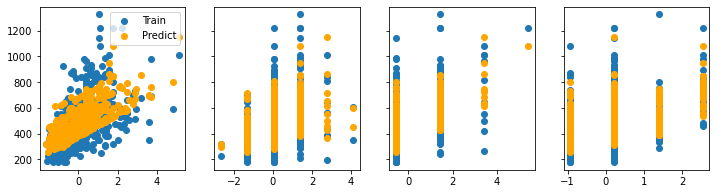

In [66]:
fig, ax = plt.subplots(1, 4, figsize = (12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[:, i], y_train, label="Train")
    ax[i].scatter(X_norm[:, i], y_pred, c="orange", label="Predict")
ax[0].legend()
plt.show()